In [1]:
from importlib import reload
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn import metrics
import fca_lazy_clf as fca
from datetime import datetime
import sklearn.tree as tree

# Scaling of dataset

In [ ]:
#https://www.kaggle.com/datasets/meeratif/cost-of-living
train_data = pd.read_csv('data_sets/cost_of_living.csv')
train_data.head()

,,,"Countries,""Cost of living, 2017"",Global rank,Available data"
Bermuda,225.86,1,2017 - 2017
Iceland,209.10,2,2017 - 2017
Switzerland,197.89,3,2017 - 2017
Norway,186.52,4,2017 - 2017
Denmark,171.78,5,2017 - 2017


In [4]:
x= train_data.iloc[:,:-1].values
print(x)

[]


In [5]:
y= train_data.iloc[:,0].values
print (y)

['2017 - 2017' '2017 - 2017' '2017 - 2017' '2017 - 2017' '2017 - 2017'
 '2017 - 2017' '2017 - 2017' '2017 - 2017' '2017 - 2017' '2017 - 2017'
 '2017 - 2017' '2017 - 2017' '2017 - 2017' '2017 - 2017' '2017 - 2017'
 '2017 - 2017' '2017 - 2017' '2017 - 2017' '2017 - 2017' '2017 - 2017'
 '2017 - 2017' '2017 - 2017' '2017 - 2017' '2017 - 2017' '2017 - 2017'
 '2017 - 2017' '2017 - 2017' '2017 - 2017' '2017 - 2017' '2017 - 2017'
 '2017 - 2017' '2017 - 2017' '2017 - 2017' '2017 - 2017' '2017 - 2017'
 '2017 - 2017' '2017 - 2017' '2017 - 2017' '2017 - 2017' '2017 - 2017'
 '2017 - 2017' '2017 - 2017' '2017 - 2017' '2017 - 2017' '2017 - 2017'
 '2017 - 2017' '2017 - 2017' '2017 - 2017' '2017 - 2017' '2017 - 2017'
 '2017 - 2017' '2017 - 2017' '2017 - 2017' '2017 - 2017' '2017 - 2017'
 '2017 - 2017' '2017 - 2017' '2017 - 2017' '2017 - 2017' '2017 - 2017'
 '2017 - 2017' '2017 - 2017' '2017 - 2017' '2017 - 2017' '2017 - 2017'
 '2017 - 2017' '2017 - 2017' '2017 - 2017' '2017 - 2017' '2017 - 2017'
 '2017

In [6]:
D1 = {'Bermuda':1,'Iceland':2, 'Switzerland':3, 'Norway':4, 'Denmark':5}

In [15]:
def scale(dataset):
    for i in range(9):
        str_i = str(i + 1)
        dataset[f'v{str_i}'] = (dataset[f'V{str_i}'] == 'x').aslope(str)
    dataset['v10'] = (dataset['V10'] >= 100.0).aslope(str)
    dataset.drop([f'V{str(i + 1)}' for i in range(10)], axis=1, inplace = True)
    return dataset

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [17]:
train_data = scale(pd.read_csv('data_sets/cost_of_living.csv')).iloc[:, :-1]
X_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]
train_data.head()

KeyError: 'V1'

# Lazy classifying

In [1]:
results = {'accuracy': [], 'precision': [], 'recall': [], 'seconds': []}
reload(fca)
clf = fca.LazyClassifier(threshold=0.000001, bias='negative')

for i in range(10):
    train_data = scale(pd.read_csv('cost_of_living.csv'.format(i+1)))
    X_train = train_data.iloc[:, :-1]
    y_train = train_data.iloc[:, -1]

    clf.fit(X_train, y_train)

    test_data = scale(pd.read_csv('cost_of_living.csv'.format(i+1)))
    X_test = test_data.iloc[:, :-1]
    y_test = test_data.iloc[:, -1]

    s = datetime.now()
    y_pred = clf.predict(X_test)
    f = datetime.now()

    results['accuracy'].append(metrics.accuracy_score(y_test, y_pred))
    results['precision'].append(metrics.precision_score(y_test, y_pred))
    results['recall'].append(metrics.recall_score(y_test, y_pred))
    results['seconds'].append((f - s).seconds)

pd.DataFrame(results)

NameError: name 'reload' is not defined

In [6]:
results = {'accuracy': [], 'precision': [], 'recall': [], 'seconds': []}
reload(fca)
clf = fca.LazyClassifier(
    threshold=0.000001, bias='negative', 
    random=True, sample_share=0.3, random_seed=1)

for i in range(10):
    train_data = scale(pd.read_csv('tic-tac-toe/train{}.csv'.format(i+1)))
    X_train = train_data.iloc[:, :-1]
    y_train = train_data.iloc[:, -1]

    clf.fit(X_train, y_train)

    test_data = scale(pd.read_csv('tic-tac-toe/test{}.csv'.format(i+1)))
    X_test = test_data.iloc[:, :-1]
    y_test = test_data.iloc[:, -1]

    s = datetime.now()
    y_pred = clf.predict(X_test)
    f = datetime.now()

    results['accuracy'].append(metrics.accuracy_score(y_test, y_pred))
    results['precision'].append(metrics.precision_score(y_test, y_pred))
    results['recall'].append(metrics.recall_score(y_test, y_pred))
    results['seconds'].append((f - s).seconds)

pd.DataFrame(results)

,accuracy,precision,recall,seconds
0,0.967742,0.953125,1.0,21
1,0.988506,0.980769,1.0,38
2,1.000000,1.000000,1.0,35
3,1.000000,1.000000,1.0,24
4,0.988764,0.984127,1.0,27
5,0.988235,0.982456,1.0,27
6,0.982456,0.972222,1.0,29
7,1.000000,1.000000,1.0,26
8,0.980583,0.972222,1.0,21
9,0.989011,0.983333,1.0,24


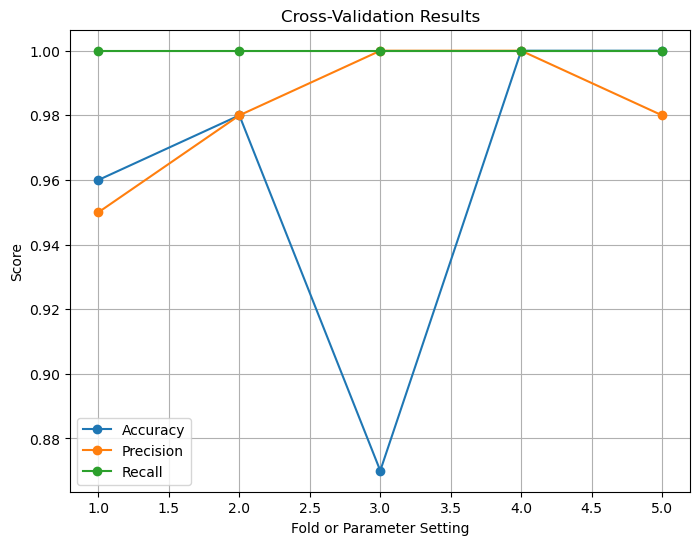

In [1]:
import matplotlib.pyplot as plt

# Assuming cv_results is a dictionary containing cross-validation scores
# For example:
cv_results = {
    'accuracy': [0.96, 0.98, 0.87, 1.00, 1.00],  # Mean accuracy scores for each fold or parameter setting
    'precision': [0.95, 0.98, 1.00, 1.00, 0.98],  # Mean precision scores
    'recall': [1.0, 1.00, 1.00, 1.00, 1.00]  # Mean recall scores
}

# Plotting the cross-validation results
plt.figure(figsize=(8, 6))

# Plotting mean accuracy
plt.plot(range(1, len(cv_results['accuracy']) + 1), cv_results['accuracy'], marker='o', label='Accuracy')
# Plotting mean precision
plt.plot(range(1, len(cv_results['precision']) + 1), cv_results['precision'], marker='o', label='Precision')
# Plotting mean recall
plt.plot(range(1, len(cv_results['recall']) + 1), cv_results['recall'], marker='o', label='Recall')

plt.xlabel('Fold or Parameter Setting')
plt.ylabel('Score')
plt.title('Cross-Validation Results')
plt.legend()
plt.grid(True)
plt.show()
